# Ridge and Lasso Regression (US-based housing company)

## Problem Statement

#### A US-based housing company named Surprise Housing has detected to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

#### We are required to build a regression model using regularisation(l1 norm and l2 norm) in order to predict the actual value of the prospective properties and decide whether to invest in them or not. We have to identify the following:

#### i) Which features are significant in predicting the price of a house,
#### ii) How well those features describe the price of a house,
#### iii) Optimal value of strength of penalty(λ) for ridge and lasso?

## Exploratory Data Analysis

In [1]:
#importing libraries to perform the data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the csv file
df = pd.read_csv('train.csv')

#showing the dataframe
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#getting some information related to the datatypes in this dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

There are some columns which has high number of nulls and lot of columns have object as datatype hence we will require to convert the datatype

In [4]:
#describing the dataframe
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


##### The id column is not an unique identifier for each entry and does not play very important role in prdicting the price of sales so dropping the column

In [5]:
df.drop('Id',axis=1,inplace=True)

In [6]:
# finding the columns having highest number of nulls
(100*(df.isnull().sum()/df.shape[0])).sort_values(ascending=False)[:20]

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtCond         2.534247
BsmtQual         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
MSSubClass       0.000000
dtype: float64

#### The above list is consisting of the features with their respective null values in decreasing order of their percentage.

#### But according to the data dictionary there are NaNs which are not actually a missing values, the particular entry dosen't have the particular feature, so we will try to fill those NaNs with None. There are some features in which nothing is mention about their NaNs, so those NaNs are missing values.

In [7]:
# checking some features for the NaNs values
df[['LotFrontage']].describe()

#It will give the summary related to the LotFrontage feature

,LotFrontage
count,1201.000000
mean,70.049958
std,24.284752
min,21.000000
25%,59.000000
50%,69.000000
75%,80.000000
max,313.000000


In [8]:
# since there is no way of putting some values in place of the NaNs values, dropping the LotFrontage feature
df.drop('LotFrontage',axis=1,inplace=True)

In [9]:
#dropping the null values for some features

#Electrical
df=df[~df.Electrical.isna()]

#MasVnrType
df=df[~df.MasVnrType.isna()]

#MasVnrArea
df=df[~df.MasVnrArea.isna()]

In [10]:
#finding all the features which still has the null values
null_features=((df.isna().sum()>0).index)[df.isna().sum()>0]
df[null_features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Alley         90 non-null     object 
 1   BsmtQual      1414 non-null   object 
 2   BsmtCond      1414 non-null   object 
 3   BsmtExposure  1413 non-null   object 
 4   BsmtFinType1  1414 non-null   object 
 5   BsmtFinType2  1413 non-null   object 
 6   FireplaceQu   766 non-null    object 
 7   GarageType    1370 non-null   object 
 8   GarageYrBlt   1370 non-null   float64
 9   GarageFinish  1370 non-null   object 
 10  GarageQual    1370 non-null   object 
 11  GarageCond    1370 non-null   object 
 12  PoolQC        7 non-null      object 
 13  Fence         281 non-null    object 
 14  MiscFeature   54 non-null     object 
dtypes: float64(1), object(14)
memory usage: 181.4+ KB


In [11]:
# dropping the GarageYrBlt feature as it is the only feature which is numerical and we cannot replace the NaNs values with any values
df.drop('GarageYrBlt',axis=1,inplace=True)

#remaining features NaNs values can be replaced by the None

In [12]:
#filling all the Nan values with None
df.fillna('None', inplace=True)

In [13]:
#checking for Nan values again
df.isna().sum().sum()

0

#### All the Nan values were replaced with None

In [14]:
#checking for duplicated records
df.duplicated().sum()

0

#### It shows that there are no duplicates record in the dataframe

In [15]:
# converting features to string
df.MSSubClass=df.MSSubClass.astype(str)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1451 non-null   object 
 1   MSZoning       1451 non-null   object 
 2   LotArea        1451 non-null   int64  
 3   Street         1451 non-null   object 
 4   Alley          1451 non-null   object 
 5   LotShape       1451 non-null   object 
 6   LandContour    1451 non-null   object 
 7   Utilities      1451 non-null   object 
 8   LotConfig      1451 non-null   object 
 9   LandSlope      1451 non-null   object 
 10  Neighborhood   1451 non-null   object 
 11  Condition1     1451 non-null   object 
 12  Condition2     1451 non-null   object 
 13  BldgType       1451 non-null   object 
 14  HouseStyle     1451 non-null   object 
 15  OverallQual    1451 non-null   int64  
 16  OverallCond    1451 non-null   int64  
 17  YearBuilt      1451 non-null   int64  
 18  YearRemo

In [17]:
#Encoding
# some of the features having following classes:
# Ex=Excellent
# Gd=Good
# TA=Average/Typical
# Fa=Fair
# Po=Poor
# None=Nan

# creating the encoder for this features

encode_qual={'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}
encode_path={'None':0, 'Grvl':1, 'Pave':2}
encode_utils={'None':0, 'ELO':1, 'NoSeWa':2, 'NoSewr':3, 'AllPub':4}
encode_expo={'None':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4}
encode_finish={'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'None':0}
encode_garage={'None':0, 'Unf':1, 'RFn':2, 'Fin':3}
encode_binary={'Y':1, 'N':0}
encode_paved={'N':0, 'P':1, 'Y':2}
encode_func={'Sal':0, 'Sev':1, 'Maj2':2, 'Maj1':3, 'Mod':4, 'Min2':5, 'Min1': 6, 'Typ':6}
encode_fence={'None':0, 'MnWw':1, 'GdWo':2, 'MnPrv':3, 'GdPrv':4}

In [18]:
#applying the encoders to their respective features

df.Street=df.Street.map(encode_path)
df.Alley=df.Alley.map(encode_path)
df.Utilities=df.Utilities.map(encode_utils)
df.ExterQual=df.ExterQual.map(encode_qual)
df.ExterCond=df.ExterCond.map(encode_qual)
df.BsmtQual=df.BsmtQual.map(encode_qual)
df.BsmtCond=df.BsmtCond.map(encode_qual)
df.BsmtExposure=df.BsmtExposure.map(encode_expo)
df.BsmtFinType1=df.BsmtFinType1.map(encode_finish)
df.BsmtFinType2=df.BsmtFinType2.map(encode_finish)
df.HeatingQC=df.HeatingQC.map(encode_qual)
df.CentralAir=df.CentralAir.map(encode_binary)
df.KitchenQual=df.KitchenQual.map(encode_qual)
df.Functional=df.Functional.map(encode_func)
df.FireplaceQu=df.FireplaceQu.map(encode_qual)
df.GarageFinish=df.GarageFinish.map(encode_garage)
df.GarageQual=df.GarageQual.map(encode_qual)
df.GarageCond=df.GarageCond.map(encode_qual)
df.PavedDrive=df.PavedDrive.map(encode_paved)
df.PoolQC=df.PoolQC.map(encode_qual)
df.Fence=df.Fence.map(encode_fence)

In [19]:
#finding all the columns with object datatype

object_cols=df.select_dtypes('object')
object_cols.head()

,MSSubClass,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,Electrical,GarageType,MiscFeature,SaleType,SaleCondition
0,60,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,None,WD,Normal
1,20,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,...,MetalSd,MetalSd,None,CBlock,GasA,SBrkr,Attchd,None,WD,Normal
2,60,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,None,WD,Normal
3,70,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,...,Wd Sdng,Wd Shng,None,BrkTil,GasA,SBrkr,Detchd,None,WD,Abnorml
4,60,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,...,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,None,WD,Normal


In [20]:
#apply the dummies on the above finded columns

df_ohe=pd.get_dummies(object_cols, drop_first=True)
df_ohe.head()

,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [21]:
#dropping the one-hot encoded features from the dataframe

df.drop(object_cols.columns, axis=1, inplace=True)

In [22]:
#connecting the df_ohe and main df dataframe

df=pd.concat([df, df_ohe], axis=1)
df.head()

,LotArea,Street,Alley,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450,2,0,4,7,5,2003,2003,196.0,4,...,0,0,0,0,1,0,0,0,1,0
1,9600,2,0,4,6,8,1976,1976,0.0,3,...,0,0,0,0,1,0,0,0,1,0
2,11250,2,0,4,7,5,2001,2002,162.0,4,...,0,0,0,0,1,0,0,0,1,0
3,9550,2,0,4,7,5,1915,1970,0.0,3,...,0,0,0,0,1,0,0,0,0,0
4,14260,2,0,4,8,5,2000,2000,350.0,4,...,0,0,0,0,1,0,0,0,1,0


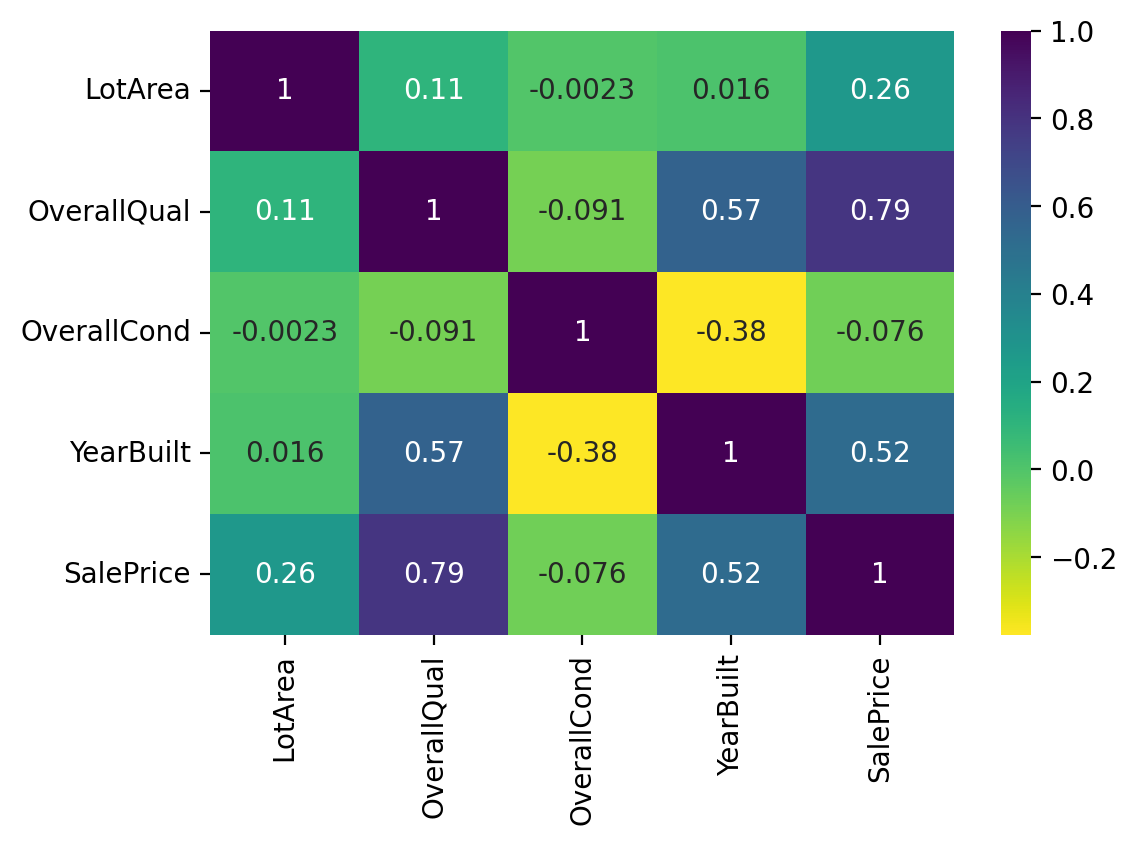

In [23]:
#finding correlation between some of the important features
plt.figure(dpi=200)
sns.heatmap(df[['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'SalePrice']].corr(), annot=True, cmap='viridis_r');

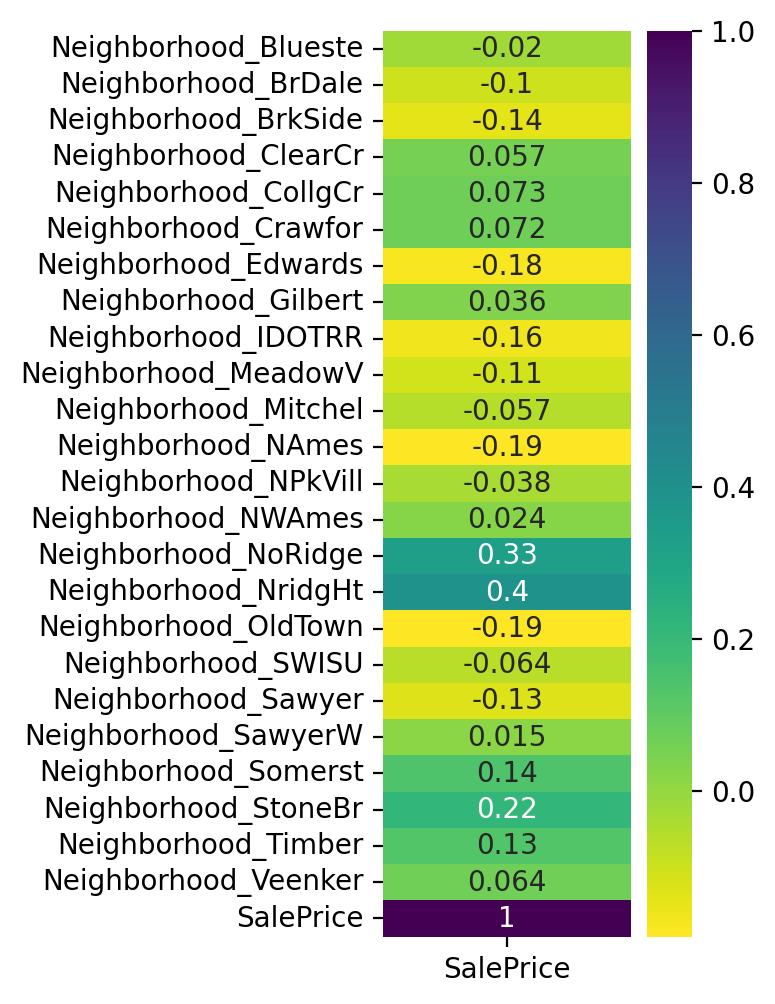

In [24]:
#finding correlation between different neighbourhoods

neigh=[]
for col in df.columns:
    if col[:2]=='Ne':
        neigh.append(col)
neigh.append('SalePrice')
plt.figure(dpi=200, figsize=(2,6))
myneigh=(df[neigh].corr())[['SalePrice']]
sns.heatmap(myneigh, annot=True, cmap='viridis_r');

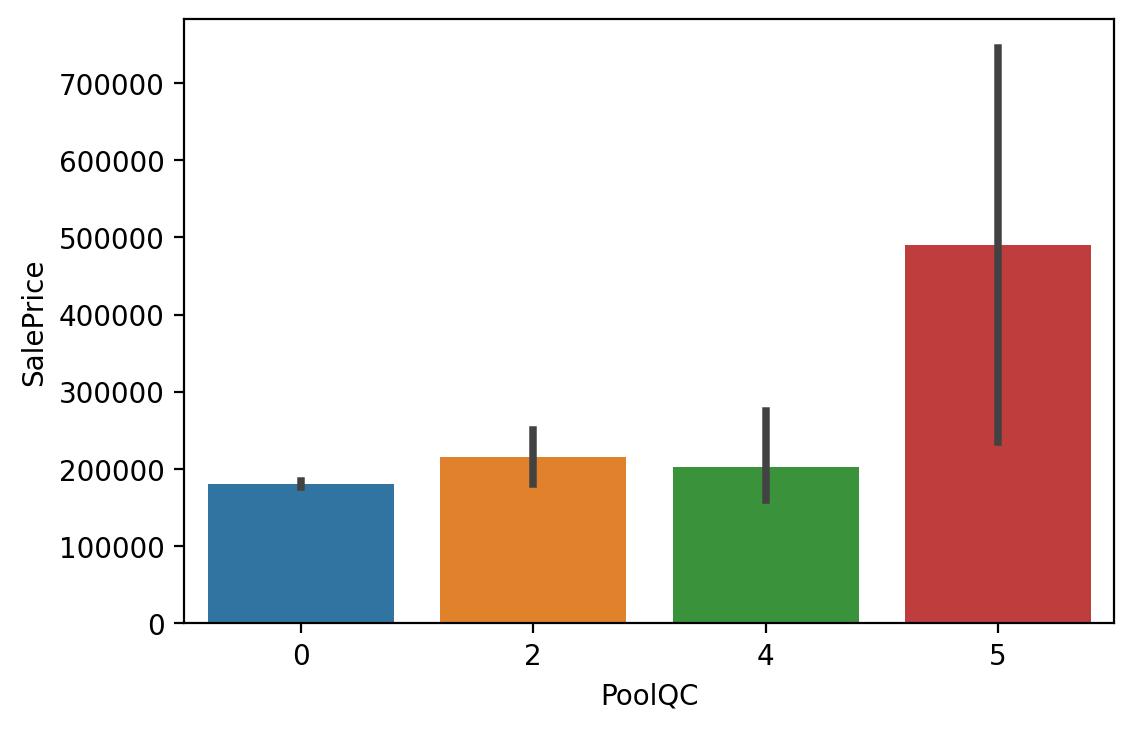

In [25]:
#correlation between PoolQc and SalePrice
plt.figure(dpi=200)
sns.barplot(x=df.PoolQC, y=df.SalePrice);

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_full=df.drop('SalePrice',axis=1)
y_full=np.log10(df.SalePrice)

# holding some percentage of dataset
X, X_hold, y, y_hold=train_test_split(X_full, y_full, test_size=0.1, random_state=1106)

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import Pipeline

In [29]:
#StandardScaler
scale=StandardScaler()

In [30]:
#Ridge object
l2_norm=Ridge()

In [31]:
#Lasso object
l1_norm=Lasso()

In [32]:
operation1=[('scale',scale),('l2_norm',l2_norm)]
operation2=[('scale',scale),('l1_norm',l1_norm)]

In [33]:
pipe1=Pipeline(steps=operation1)
pipe2=Pipeline(steps=operation2)

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
#creating ridge model
param_ridge={'l2_norm__alpha':np.logspace(2.65,2.7,100)}

In [36]:
grid_ridge=GridSearchCV(estimator=pipe1, param_grid=param_ridge, cv=5, scoring='r2', return_train_score=True)

In [37]:
grid_ridge.fit(X,y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('l2_norm', Ridge())]),
             param_grid={'l2_norm__alpha': array([446.68359215, 447.20335238, 447.72371741, 448.24468793,
       448.76626465, 449.28844828, 449.81123952, 450.33463907,
       450.85864766, 451.38326598, 451.90849474, 452.43433466,
       452.96078645, 453.48785081, 454.01552847, 454.54382013,
       455.07272651,...
       487.95956827, 488.52735715, 489.09580672, 489.66491773,
       490.23469095, 490.80512717, 491.37622714, 491.94799164,
       492.52042145, 493.09351733, 493.66728007, 494.24171044,
       494.81680922, 495.39257717, 495.96901509, 496.54612376,
       497.12390394, 497.70235643, 498.28148201, 498.86128145,
       499.44175555, 500.02290509, 500.60473085, 501.18723363])},
             return_train_score=True, scoring='r2')

In [38]:
grid_ridge.best_estimator_

Pipeline(steps=[('scale', StandardScaler()),
                ('l2_norm', Ridge(alpha=477.8514732339196))])

In [39]:
grid_ridge_results=pd.DataFrame(grid_ridge.cv_results_)
grid_ridge_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_l2_norm__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.011772,0.006130,0.005514,0.005053,446.683592,{'l2_norm__alpha': 446.683592150963},0.848970,0.905281,0.885784,0.918042,...,0.869619,0.046131,100,0.919506,0.907248,0.913138,0.906599,0.928203,0.914939,0.008108
1,0.012576,0.006456,0.003124,0.006248,447.203352,{'l2_norm__alpha': 447.20335238362566},0.848971,0.905270,0.885788,0.918042,...,0.869620,0.046126,99,0.919488,0.907231,0.913120,0.906580,0.928188,0.914922,0.008109
2,0.009462,0.007727,0.003124,0.006248,447.723717,{'l2_norm__alpha': 447.72371740837025},0.848973,0.905260,0.885792,0.918043,...,0.869621,0.046122,98,0.919470,0.907214,0.913102,0.906561,0.928173,0.914904,0.008111
3,0.012577,0.006290,0.003124,0.006249,448.244688,{'l2_norm__alpha': 448.24468792893083},0.848975,0.905249,0.885796,0.918043,...,0.869622,0.046117,97,0.919452,0.907197,0.913084,0.906542,0.928159,0.914887,0.008112
4,0.008451,0.007103,0.003124,0.006248,448.766265,{'l2_norm__alpha': 448.76626464986174},0.848977,0.905238,0.885801,0.918044,...,0.869623,0.046113,96,0.919435,0.907180,0.913065,0.906523,0.928144,0.914869,0.008113


In [40]:
grid_ridge.best_score_

0.8696441893427125

In [41]:
#the r-squared of the ridge estimator is 87%

grid_ridge.best_estimator_[1].alpha

477.8514732339196

### The optimal value of λ for Ridge regression is 477.85

In [42]:
ridge=Ridge(grid_ridge.best_estimator_[1].alpha)

In [43]:
from sklearn.feature_selection import RFE

In [44]:
tmp_rfe_ridge1=RFE(ridge, n_features_to_select=1)

In [45]:
std=StandardScaler()

# fit_transforming the train set
# transforming the test set

X_std=std.fit_transform(X)
X_hold_std=std.transform(X_hold)

y_std=std.fit_transform(y.values.reshape(-1,1))
y_hold_std=std.transform(y_hold.values.reshape(-1,1))

In [46]:
tmp_rfe_ridge1.fit(X_std,y_std)

RFE(estimator=Ridge(alpha=477.8514732339196), n_features_to_select=1)

In [47]:
# checking the features
l1=list(zip(X.columns,tmp_rfe_ridge1.ranking_))
l1.sort(key=lambda x:x[1])
l1=pd.DataFrame(l1)
l1.columns=['features_alpha','ranking_alpha']

In [48]:
ridge_2alpha=Ridge(2*grid_ridge.best_estimator_[1].alpha)

In [49]:
tmp_rfe_ridge2=RFE(ridge_2alpha, n_features_to_select=1)

In [50]:
tmp_rfe_ridge2.fit(X_std,y_std)

RFE(estimator=Ridge(alpha=955.7029464678392), n_features_to_select=1)

In [51]:
# checking the features
l2=list(zip(X.columns,tmp_rfe_ridge2.ranking_))
l2.sort(key=lambda x:x[1])
l2=pd.DataFrame(l2)
l2.columns=['features_2alpha','ranking_2alpha']

In [52]:
#comparing the features with the optimal value and its double value

compare_ridge=pd.concat([l1,l2],axis=1)
compare_ridge.head(10)

,features_alpha,ranking_alpha,features_2alpha,ranking_2alpha
0,OverallQual,1,OverallQual,1
1,GrLivArea,2,GrLivArea,2
2,GarageCars,3,GarageCars,3
3,KitchenQual,4,KitchenQual,4
4,BsmtQual,5,BsmtQual,5
5,1stFlrSF,6,1stFlrSF,6
6,YearBuilt,7,YearBuilt,7
7,FireplaceQu,8,Fireplaces,8
8,OverallCond,9,ExterQual,9
9,MSZoning_RL,10,TotRmsAbvGrd,10


#### Top 7 features which are same for both the version with slight change in ranking of their features

In [53]:
#Residual Analysis(Ridge)
#fit the data on ridge regression object

ridge.fit(X_std,y_std)

Ridge(alpha=477.8514732339196)

In [54]:
#making prediction
y_pred=ridge.predict(X_std)
y_pred

array([[-0.14376317],
       [-0.80330325],
       [-0.45551229],
       ...,
       [ 0.04120945],
       [-0.21650447],
       [-0.77278381]])

In [55]:
#residuals
res=y_std-y_pred
res

array([[ 0.06775451],
       [ 0.19809113],
       [ 0.23456409],
       ...,
       [ 0.03461353],
       [-0.13194022],
       [-0.00213176]])

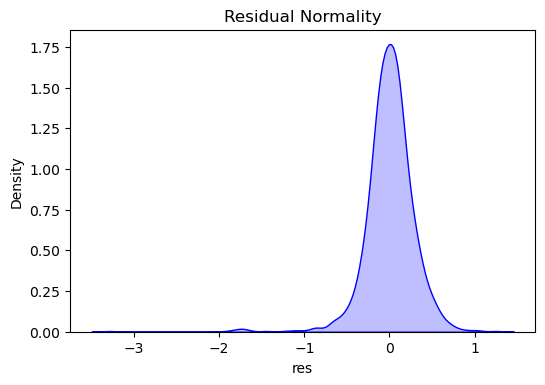

In [56]:
plt.figure(dpi=100)
plt.title('Residual Normality')
sns.kdeplot(res.reshape(1,-1)[0], shade=True, color='Blue')
plt.xlabel('res');

#### The above plot show that the residuals are normal and centered around 0

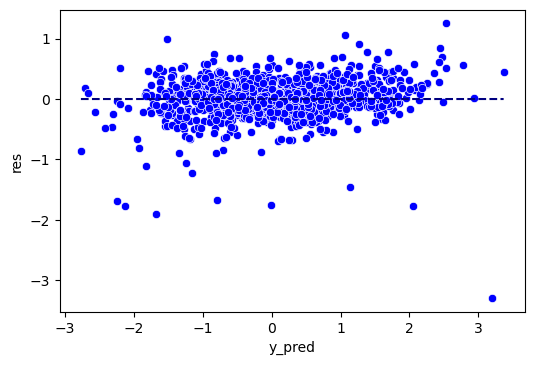

In [57]:
#residual plot with respect to the predicted values
plt.figure(dpi=100)
sns.scatterplot(x=y_pred.reshape(1,-1)[0], y=res.reshape(1,-1)[0], color='Blue')
plt.ylabel('res')
plt.xlabel('y_pred')
sns.lineplot(x=y_pred.reshape(1,-1)[0], y=0, color='navy', ls='--');

#### Residuals are having uniform variance and are independent

In [58]:
#Evaluating the performance
from sklearn.metrics import mean_absolute_error, r2_score

In [59]:
y_hold_pred=ridge.predict(X_hold_std)

In [60]:
r2_ridge_hold=r2_score(y_hold_std, y_hold_pred)
r2_ridge_hold

0.881746283333125

In [61]:
MAE=mean_absolute_error(10**y_hold, 10**std.inverse_transform(y_hold_pred))
MAE

17471.0458330932

In [62]:
# mean of all SalePrice
mean_sp= (10**y_hold).mean()
mean_sp

186457.7123287671

In [63]:
error_perc=100*(MAE/mean_sp)
error_perc

9.36997757555225

### Ridge model performance:
####     predictive r2_score = 88%
####     The sale price are off by ±9.36 %

In [64]:
#creating lasso Model
param_lasso={'l1_norm__alpha':np.logspace(-2.75,-2.7,100)}

In [65]:
grid_lasso=GridSearchCV(estimator=pipe2, param_grid=param_lasso, cv=5, scoring='r2', return_train_score=True)

In [66]:
grid_lasso.fit(X,y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('l1_norm', Lasso())]),
             param_grid={'l1_norm__alpha': array([0.00177828, 0.00178035, 0.00178242, 0.00178449, 0.00178657,
       0.00178865, 0.00179073, 0.00179281, 0.0017949 , 0.00179699,
       0.00179908, 0.00180117, 0.00180327, 0.00180537, 0.00180747,
       0.00180957, 0.00181168, 0.00181379, 0.0018159 , 0.00181801,
       0.0...
       0.00192909, 0.00193134, 0.00193359, 0.00193584, 0.00193809,
       0.00194034, 0.0019426 , 0.00194486, 0.00194713, 0.00194939,
       0.00195166, 0.00195393, 0.0019562 , 0.00195848, 0.00196076,
       0.00196304, 0.00196532, 0.00196761, 0.0019699 , 0.00197219,
       0.00197449, 0.00197679, 0.00197909, 0.00198139, 0.00198369,
       0.001986  , 0.00198831, 0.00199063, 0.00199294, 0.00199526])},
             return_train_score=True, scoring='r2')

In [67]:
grid_lasso.best_estimator_

Pipeline(steps=[('scale', StandardScaler()),
                ('l1_norm', Lasso(alpha=0.0019001499684190594))])

In [68]:
grid_lasso_results=pd.DataFrame(grid_lasso.cv_results_)
grid_lasso_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_l1_norm__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.015961,0.006000,0.002194,0.002221,0.001778,{'l1_norm__alpha': 0.0017782794100389228},0.837794,0.917228,0.881044,0.920110,...,0.865207,0.056239,100,0.920707,0.908771,0.915110,0.908556,0.928344,0.916297,0.007517
1,0.021749,0.007760,0.003124,0.006249,0.00178,{'l1_norm__alpha': 0.0017803486127948383},0.837793,0.917227,0.881057,0.920133,...,0.865212,0.056247,99,0.920690,0.908756,0.915092,0.908531,0.928330,0.916280,0.007520
2,0.026656,0.005759,0.010449,0.018505,0.001782,{'l1_norm__alpha': 0.001782420223271399},0.837791,0.917226,0.881069,0.920156,...,0.865217,0.056255,98,0.920672,0.908740,0.915074,0.908507,0.928317,0.916262,0.007522
3,0.017431,0.002059,0.004522,0.005775,0.001784,{'l1_norm__alpha': 0.0017844942442702206},0.837790,0.917225,0.881082,0.920179,...,0.865222,0.056263,97,0.920655,0.908725,0.915056,0.908482,0.928304,0.916244,0.007525
4,0.015759,0.000273,0.000000,0.000000,0.001787,{'l1_norm__alpha': 0.0017865706785961841},0.837788,0.917223,0.881095,0.920201,...,0.865227,0.056271,96,0.920637,0.908710,0.915038,0.908457,0.928291,0.916227,0.007527


In [69]:
grid_lasso.best_score_

0.865428561695927

In [70]:
#the r-squared of the lasso estimator is 87%

grid_lasso.best_estimator_[1].alpha

0.0019001499684190594

### The optimal value of λ for Lasso regression is 0.0019

In [71]:
lasso=Lasso(grid_lasso.best_estimator_[1].alpha)
lasso

Lasso(alpha=0.0019001499684190594)

In [72]:
tmp_rfe_lasso1=RFE(lasso, n_features_to_select=1)

In [73]:
tmp_rfe_lasso1.fit(X_std,y_std)

RFE(estimator=Lasso(alpha=0.0019001499684190594), n_features_to_select=1)

In [74]:
# checking the features
l3=list(zip(X.columns,tmp_rfe_lasso1.ranking_))
l3.sort(key=lambda x:x[1])
l3=pd.DataFrame(l3)
l3.columns=['features_alpha','ranking_alpha']

In [75]:
lasso_2alpha=Lasso(2*grid_lasso.best_estimator_[1].alpha)

In [76]:
tmp_rfe_lasso2=RFE(lasso_2alpha, n_features_to_select=1)

In [77]:
tmp_rfe_lasso2.fit(X_std,y_std)

RFE(estimator=Lasso(alpha=0.003800299936838119), n_features_to_select=1)

In [78]:
# checking the features
l4=list(zip(X.columns,tmp_rfe_lasso2.ranking_))
l4.sort(key=lambda x:x[1])
l4=pd.DataFrame(l4)
l4.columns=['features_2alpha','ranking_2alpha']

In [79]:
#comparing the features with the optimal value and its double value

compare_lasso=pd.concat([l3,l4],axis=1)
compare_lasso.head(10)

,features_alpha,ranking_alpha,features_2alpha,ranking_2alpha
0,OverallQual,1,OverallQual,1
1,GrLivArea,2,GrLivArea,2
2,YearBuilt,3,YearBuilt,3
3,OverallCond,4,GarageCars,4
4,TotalBsmtSF,5,OverallCond,5
5,RoofMatl_CompShg,6,TotalBsmtSF,6
6,RoofMatl_Tar&Grv,7,MSZoning_RL,7
7,RoofMatl_WdShngl,8,RoofMatl_CompShg,8
8,RoofMatl_Metal,9,RoofMatl_Tar&Grv,9
9,RoofMatl_Membran,10,RoofMatl_WdShngl,10


#### Top 3 features which are same for both the version, other than that the features are very different in both the version

In [80]:
#Residual Analysis(Lasso)
# fit the data on the lasso regression object
lasso.fit(X_std,y_std)

Lasso(alpha=0.0019001499684190594)

In [81]:
# making predictions off the data 
y_pred_lasso=lasso.predict(X_std)
y_pred_lasso

array([-0.15241297, -0.81606443, -0.36923842, ...,  0.04014383,
       -0.24537451, -0.73063997])

In [82]:
#residuals
res_lasso=y_std-y_pred_lasso.reshape(-1,1)
res_lasso=res_lasso.reshape(1,-1)[0]
res_lasso

array([ 0.07640431,  0.21085231,  0.14829022, ...,  0.03567915,
       -0.10307017, -0.04427559])

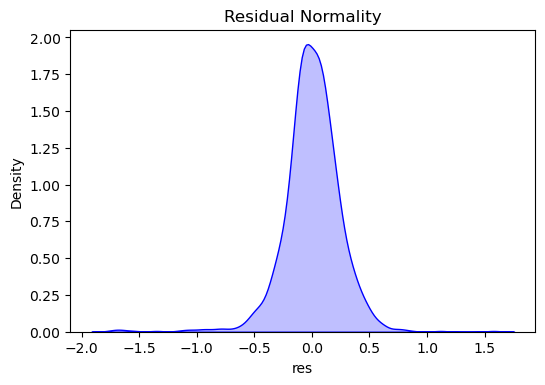

In [83]:
plt.figure(dpi=100)
plt.title('Residual Normality')
sns.kdeplot(res_lasso, shade=True, color='Blue')
plt.xlabel('res');

#### The residual plot show that the residuals are normal and centered around 0

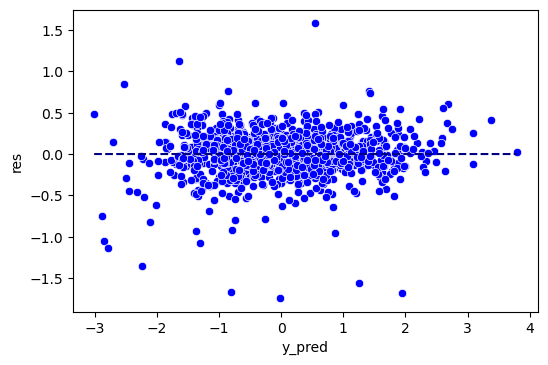

In [84]:
plt.figure(dpi=100)
sns.scatterplot(x=y_pred_lasso, y=res_lasso, color='Blue')
plt.ylabel('res')
plt.xlabel('y_pred')
sns.lineplot(x=y_pred_lasso, y=0, color='navy', ls='--');

### The residuals are having uniform variance and are independent

In [85]:
#Evaluating the performance
y_hold_pred_lasso=lasso.predict(X_hold_std)

In [86]:
r2_score(y_hold_std, y_hold_pred_lasso)

0.9006139250267841

In [87]:
MAE_lasso=mean_absolute_error(10**y_hold,10**std.inverse_transform(y_hold_pred_lasso.reshape(1,-1))[0])
MAE_lasso

15331.167281750213

In [88]:
error_perc_lasso=100*(MAE_lasso/mean_sp)
error_perc_lasso

8.222329390547225

### Lasso model performance:
####     predictive r2_score = 90%
####     The sale price are off by ±8.22 %

In [89]:
#Performance Comparison
(ridge.coef_!=0).sum()

215

In [90]:
(lasso.coef_!=0).sum()

161

In [91]:
#Lasso uses 161 predictor variables and Ridge uses 215 predictor variables. Hence Lasso is a lighter model

In [92]:
#Final model
#chose lasso model for the final model

lasso_coef=list(zip(X.columns, lasso.coef_))
lasso_coef=pd.DataFrame(lasso_coef)
lasso_coef

,0,1
0,LotArea,0.053028
1,Street,0.015095
2,Alley,0.010278
3,Utilities,0.014307
4,OverallQual,0.162949
...,...,...
210,SaleCondition_AdjLand,0.013807
211,SaleCondition_Alloca,0.006489
212,SaleCondition_Family,-0.000000
213,SaleCondition_Normal,0.056184
